In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
import matplotlib.font_manager as fm

[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]
plt.rcParams['font.family'] = 'Malgun Gothic'

In [30]:
df_01 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_01_DEMO.csv')
df_02 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_02_PDDE.csv')
df_03 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_03_COP_U.csv')
df_04 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_04_PD_CLAC.csv')
df_05 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_05_BR.csv')
df_06 = pd.read_csv('../bigdata/LPOINT_BIG_COMP/LPOINT_BIG_COMP_06_LPAY.csv')

In [34]:
df_merge_01_02 = pd.merge(df_02, df_01, how='inner', on='cust')
df_merge_01_02 = df_merge_01_02.fillna(-999)
df_merge_01_02

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,여성,50대,Z17
1,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17
3,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17
4,M430112881,A01000005297,1,A01,A010039,PD1692,20210101,10,9900.0,1,여성,50대,Z17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M498069014,E06052019590,2,A06,-999,PD0507,20211227,16,100000.0,1,여성,40대,Z14
4381739,M498069014,E06052019590,2,A06,-999,PD0507,20211227,16,100000.0,1,여성,40대,Z14
4381740,M498069014,E06052019590,2,A06,-999,PD0507,20211227,16,100000.0,1,여성,40대,Z14
4381741,M498069014,E06052019590,2,A06,-999,PD0507,20211227,16,100000.0,1,여성,40대,Z14


<AxesSubplot:xlabel='chnl_dv', ylabel='count'>

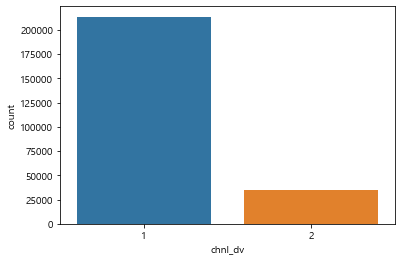

In [51]:
sns.countplot(x=df_03['chnl_dv'], data=df_03)

In [52]:
df_03.isna().sum()

cust        0
rct_no      0
cop_c       0
br_c       55
chnl_dv     0
de_dt       0
vst_dt      0
de_hr       0
buy_am      0
dtype: int64

<AxesSubplot:xlabel='chnl_dv', ylabel='count'>

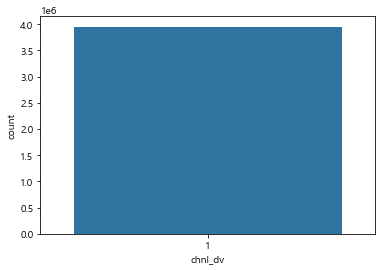

In [48]:
df_merge_01_02[['br_c', 'chnl_dv']]
res = df_merge_01_02[df_merge_01_02['br_c'] != -999]
sns.countplot(x=res['chnl_dv'], data=res)

In [42]:
df_03

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500
...,...,...,...,...,...,...,...,...,...
248299,M058650684,21111614C021426818,C02,C020002,1,20211116,20211116,14,2000
248300,M058650684,21111619C023223432,C02,C020002,1,20211116,20211116,19,26900
248301,M014154595,21121209C015324520,C01,C010087,2,20211212,20211212,9,2000
248302,M510878172,21112719C013369102,C01,C010007,2,20211127,20211127,19,6000


In [41]:
df_03.isna().sum()

cust        0
rct_no      0
cop_c       0
br_c       55
chnl_dv     0
de_dt       0
vst_dt      0
de_hr       0
buy_am      0
dtype: int64

#### 결측치 채우기

In [13]:
import random

def random_choice(zon_hlv, cop_c):
    filt = df_05['zon_hlv'] == zon_hlv
    filt2 = df_05['cop_c'] == cop_c
    res = df_05[filt][filt2]
    br_c_list = []

    try:        
        for i in range(len(res['br_c'])):
            test = res['br_c'].reset_index()
            ans = test['br_c'][i]
            br_c_list.append(ans)

        random_store = random.choice(br_c_list)

        return random_store

    except: IndexError

In [6]:
for i in range(len(df_merge_01_02)):
    if df_merge_01_02.loc[i, 'br_c'] == -999:    
        zon_hlv = df_merge_01_02.loc[i]['zon_hlv']
        cop_c = df_merge_01_02.loc[i]['cop_c']
        df_merge_01_02.loc[i, 'br_c'] = random_choice(zon_hlv, cop_c)


In [10]:
df_merge_01_02.isna().sum()

cust             0
rct_no           0
chnl_dv          0
cop_c            0
br_c         76672
pd_c             0
de_dt            0
de_hr            0
buy_am           0
buy_ct           0
ma_fem_dv        0
ages             0
zon_hlv          0
dtype: int64

In [8]:
df_merge_01_02.to_csv('df_merge_01_02.csv')

In [14]:
df_merge_01_02_isna = df_merge_01_02[df_merge_01_02['br_c'] == -999]
df_merge_01_02_isna

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv
418,M646853852,E01001415268,2,A01,-999,PD0025,20210223,21,1761000.0,1,여성,40대,Z13
419,M646853852,E01001416273,2,A01,-999,PD0025,20210223,21,1761000.0,1,여성,40대,Z13
420,M646853852,E01001417672,2,A01,-999,PD0025,20210223,21,416000.0,1,여성,40대,Z13
766,M646853852,E06024223441,2,A06,-999,PD1736,20210403,14,11900.0,1,여성,40대,Z13
767,M646853852,E06029401213,2,A06,-999,PD0124,20210419,17,185800.0,2,여성,40대,Z13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M498069014,E06052019590,2,A06,-999,PD0507,20211227,16,100000.0,1,여성,40대,Z14
4381739,M498069014,E06052019590,2,A06,-999,PD0507,20211227,16,100000.0,1,여성,40대,Z14
4381740,M498069014,E06052019590,2,A06,-999,PD0507,20211227,16,100000.0,1,여성,40대,Z14
4381741,M498069014,E06052019590,2,A06,-999,PD0507,20211227,16,100000.0,1,여성,40대,Z14


In [15]:
df_merge_01_02_isna['br_c'] = df_merge_01_02_isna.apply(lambda x : random_choice(x['zon_hlv'], x['cop_c']), axis=1)

In [8]:
df_merge_01_02_isna

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv
418,M646853852,E01001415268,2,A01,A010016,PD0025,20210223,21,1761000.0,1,여성,40대,Z13
419,M646853852,E01001416273,2,A01,A010025,PD0025,20210223,21,1761000.0,1,여성,40대,Z13
420,M646853852,E01001417672,2,A01,A010016,PD0025,20210223,21,416000.0,1,여성,40대,Z13
766,M646853852,E06024223441,2,A06,None,PD1736,20210403,14,11900.0,1,여성,40대,Z13
767,M646853852,E06029401213,2,A06,None,PD0124,20210419,17,185800.0,2,여성,40대,Z13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M498069014,E06052019590,2,A06,NaN,PD0507,20211227,16,100000.0,1,여성,40대,Z14
4381739,M498069014,E06052019590,2,A06,NaN,PD0507,20211227,16,100000.0,1,여성,40대,Z14
4381740,M498069014,E06052019590,2,A06,NaN,PD0507,20211227,16,100000.0,1,여성,40대,Z14
4381741,M498069014,E06052019590,2,A06,NaN,PD0507,20211227,16,100000.0,1,여성,40대,Z14


In [8]:
import multiprocessing as mp
import numpy as np
num_cores = 6
def parallel_dataframe(df, func):
    global num_cores
    df_split = np.array_split(df, num_cores)
    pool = mp.Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df


In [9]:
def multiply_columns(df):
    df['br_c'] = df.apply(lambda x : random_choice(x['zon_hlv'], x['cop_c']), axis=1)
    return df

In [10]:
parallel_dataframe(df_merge_01_02_isna[:5], multiply_columns)

### df_05 데이터 확인

In [27]:
df_merge_01_02 = df_merge_01_02.fillna(-999)
res = df_merge_01_02[df_merge_01_02['br_c'] == -999]

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv
766,M646853852,E06024223441,2,A06,-999,PD1736,20210403,14,11900.0,1,여성,40대,Z13
767,M646853852,E06029401213,2,A06,-999,PD0124,20210419,17,185800.0,2,여성,40대,Z13
1517,M641274652,E06036047063,2,A06,-999,PD0617,20210506,8,77600.0,2,여성,60대,Z11
3012,M174599398,E06002893841,2,A06,-999,PD0777,20210122,14,109000.0,1,여성,30대,Z17
3013,M174599398,E06009297823,2,A06,-999,PD0511,20210210,14,4900.0,1,여성,30대,Z17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4381738,M498069014,E06052019590,2,A06,-999,PD0507,20211227,16,100000.0,1,여성,40대,Z14
4381739,M498069014,E06052019590,2,A06,-999,PD0507,20211227,16,100000.0,1,여성,40대,Z14
4381740,M498069014,E06052019590,2,A06,-999,PD0507,20211227,16,100000.0,1,여성,40대,Z14
4381741,M498069014,E06052019590,2,A06,-999,PD0507,20211227,16,100000.0,1,여성,40대,Z14


In [44]:
res[res['zon_hlv'] == 'Z02']['cop_c'].unique()

array(['A06', 'A02'], dtype=object)

<AxesSubplot:xlabel='cop_c', ylabel='count'>

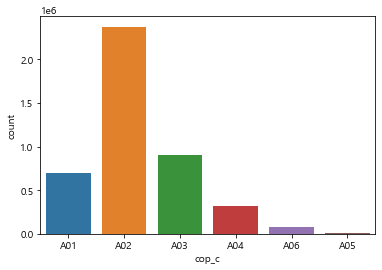

In [17]:
sns.countplot(x='cop_c', data=res)

<AxesSubplot:xlabel='zon_hlv', ylabel='count'>

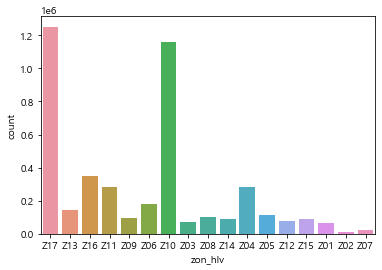

In [18]:
sns.countplot(x='zon_hlv', data=res)

In [46]:
filt = df_05['zon_hlv'] == 'Z02'
filt2 = df_05['cop_c'] == 'A06'
ans = df_05[filt][filt2]
ans

,br_c,cop_c,zon_hlv,zon_mcls


### 결측치 제거

In [3]:
df_merge_01_02 = pd.read_csv('./df_merge_01_02.csv')
df_merge_01_02.head(3)

,Unnamed: 0,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv
0,0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1,여성,50대,Z17
1,1,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17
2,2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1,여성,50대,Z17


In [4]:
df_merge_01_02.dropna(axis=0, inplace=True)
df_merge_01_02.drop(columns=['Unnamed: 0', 'rct_no', 'chnl_dv'], inplace=True)

In [5]:
df_merge_01_02.isna().sum()

cust         0
cop_c        0
br_c         0
pd_c         0
de_dt        0
de_hr        0
buy_am       0
buy_ct       0
ma_fem_dv    0
ages         0
zon_hlv      0
dtype: int64

### LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

encoder = LabelEncoder()
columns_list = ['cust', 'cop_c', 'pd_c', 'ma_fem_dv', 'ages', 'zon_hlv', 'br_c']

for i in columns_list:
    df_merge_01_02[i] = encoder.fit_transform(df_merge_01_02[i])

In [7]:
print(encoder.classes_)
print(encoder.inverse_transform([4,5,2,0,1,3]))

['A010001' 'A010002' 'A010003' ... 'A050438' 'A050439' 'A050440']
['A010005' 'A010006' 'A010003' 'A010001' 'A010002' 'A010004']


In [8]:
df_merge_01_02

,cust,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv
0,11393,0,38,274,20210101,10,15000.0,1,1,3,16
1,11393,0,38,274,20210101,10,19000.0,1,1,3,16
2,11393,0,38,274,20210101,10,19000.0,1,1,3,16
3,11393,0,38,274,20210101,10,19000.0,1,1,3,16
4,11393,0,38,1636,20210101,10,9900.0,1,1,3,16
...,...,...,...,...,...,...,...,...,...,...,...
4379040,25686,4,6443,111,20211230,17,115000.0,1,1,3,3
4379041,9127,4,6409,1615,20211226,17,8000.0,1,0,3,16
4379042,9127,4,6409,135,20211226,17,22000.0,1,0,3,16
4379043,376,4,6533,401,20211228,18,259000.0,1,1,1,3


In [9]:
df_merge_01_02.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4305071 entries, 0 to 4379044
Data columns (total 11 columns):
 #   Column     Dtype  
---  ------     -----  
 0   cust       int32  
 1   cop_c      int32  
 2   br_c       int32  
 3   pd_c       int32  
 4   de_dt      int64  
 5   de_hr      int64  
 6   buy_am     float64
 7   buy_ct     int64  
 8   ma_fem_dv  int32  
 9   ages       int32  
 10  zon_hlv    int32  
dtypes: float64(1), int32(7), int64(3)
memory usage: 279.2 MB


### 이상치 확인
- Turky fence

<AxesSubplot:xlabel='buy_am', ylabel='buy_ct'>

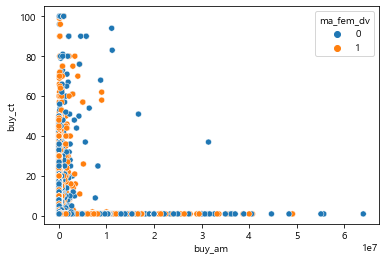

In [91]:
sns.scatterplot(x='buy_am', y='buy_ct', hue='ma_fem_dv', data=df_merge_01_02)

In [92]:
def find_outlier(df):
    q1, q3 = np.percentile(df, [25, 75])
    iqr = q3 - q1

    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)

    mask = np.where((df > upper_bound) | (df < lower_bound))

    return mask

In [93]:
mask = find_outlier(df_merge_01_02['buy_am'])
len(mask[0])

504067

<AxesSubplot:>

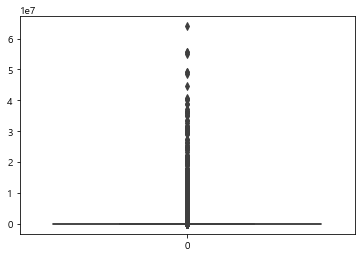

In [94]:
sns.boxplot(data=df_merge_01_02['buy_am'])

In [13]:
df_merge_01_02['br_c'].nunique()

6755

In [10]:
x = df_merge_01_02.drop(columns='br_c', axis=1)
y = df_merge_01_02['br_c']

In [11]:
y

0            38
1            38
2            38
3            38
4            38
           ... 
4379040    6443
4379041    6409
4379042    6409
4379043    6533
4379044    6339
Name: br_c, Length: 4305071, dtype: int32

In [12]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled[:30000], y[:30000], test_size=0.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape , X_test.shape)
print(X_tr.shape, X_val.shape)

(24000, 10) (6000, 10)
(21600, 10) (2400, 10)


In [22]:
import xgboost as xgb
from xgboost import plot_importance

dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [16]:
params = { 'max_depth':3,
           'num_class':6755,
           'eta':0.05,
           'objective':'multi:softmax',
           'eval_metric':'mlogloss',
           'tree_method':'gpu_hist',
           'gpu_id':0
         }
num_rounds = 500

In [17]:
eval_list = [(dtr,'train'),(dval,'eval')]

xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds, \
                      early_stopping_rounds=50, evals=eval_list)

[0]	train-mlogloss:8.50271	eval-mlogloss:8.38857
[1]	train-mlogloss:7.03990	eval-mlogloss:6.87548
[2]	train-mlogloss:6.56161	eval-mlogloss:6.37466
[3]	train-mlogloss:6.35653	eval-mlogloss:6.17053
[4]	train-mlogloss:6.23357	eval-mlogloss:6.05321
[5]	train-mlogloss:6.13195	eval-mlogloss:5.95673
[6]	train-mlogloss:6.04957	eval-mlogloss:5.87463
[7]	train-mlogloss:5.94643	eval-mlogloss:5.77043
[8]	train-mlogloss:5.88129	eval-mlogloss:5.70602
[9]	train-mlogloss:5.82481	eval-mlogloss:5.65079
[10]	train-mlogloss:5.76984	eval-mlogloss:5.59708
[11]	train-mlogloss:5.72062	eval-mlogloss:5.54947
[12]	train-mlogloss:5.67641	eval-mlogloss:5.50711
[13]	train-mlogloss:5.63521	eval-mlogloss:5.46709
[14]	train-mlogloss:5.59696	eval-mlogloss:5.42954
[15]	train-mlogloss:5.56126	eval-mlogloss:5.39450
[16]	train-mlogloss:5.52780	eval-mlogloss:5.36133
[17]	train-mlogloss:5.49508	eval-mlogloss:5.32896
[18]	train-mlogloss:5.46249	eval-mlogloss:5.29766
[19]	train-mlogloss:5.43238	eval-mlogloss:5.26810
[20]	train

[163]	train-mlogloss:3.30383	eval-mlogloss:3.24508
[164]	train-mlogloss:3.29404	eval-mlogloss:3.23514
[165]	train-mlogloss:3.28392	eval-mlogloss:3.22497
[166]	train-mlogloss:3.27150	eval-mlogloss:3.21331
[167]	train-mlogloss:3.26257	eval-mlogloss:3.20488
[168]	train-mlogloss:3.25462	eval-mlogloss:3.19736
[169]	train-mlogloss:3.24736	eval-mlogloss:3.19062
[170]	train-mlogloss:3.24024	eval-mlogloss:3.18376
[171]	train-mlogloss:3.23333	eval-mlogloss:3.17738
[172]	train-mlogloss:3.17689	eval-mlogloss:3.12892
[173]	train-mlogloss:3.15592	eval-mlogloss:3.11014
[174]	train-mlogloss:3.14611	eval-mlogloss:3.10110
[175]	train-mlogloss:3.13747	eval-mlogloss:3.09333
[176]	train-mlogloss:3.12955	eval-mlogloss:3.08603
[177]	train-mlogloss:3.11226	eval-mlogloss:3.06865
[178]	train-mlogloss:3.09868	eval-mlogloss:3.05477
[179]	train-mlogloss:3.08817	eval-mlogloss:3.04494
[180]	train-mlogloss:3.06714	eval-mlogloss:3.02297
[181]	train-mlogloss:3.04867	eval-mlogloss:3.00339
[182]	train-mlogloss:3.02992	ev

[324]	train-mlogloss:1.76186	eval-mlogloss:1.82047
[325]	train-mlogloss:1.75758	eval-mlogloss:1.81640
[326]	train-mlogloss:1.75351	eval-mlogloss:1.81236
[327]	train-mlogloss:1.74992	eval-mlogloss:1.80890
[328]	train-mlogloss:1.74649	eval-mlogloss:1.80567
[329]	train-mlogloss:1.74321	eval-mlogloss:1.80246
[330]	train-mlogloss:1.74033	eval-mlogloss:1.79993
[331]	train-mlogloss:1.73782	eval-mlogloss:1.79760
[332]	train-mlogloss:1.73533	eval-mlogloss:1.79525
[333]	train-mlogloss:1.73305	eval-mlogloss:1.79308
[334]	train-mlogloss:1.73088	eval-mlogloss:1.79118
[335]	train-mlogloss:1.72003	eval-mlogloss:1.78408
[336]	train-mlogloss:1.71130	eval-mlogloss:1.77817
[337]	train-mlogloss:1.70681	eval-mlogloss:1.77504
[338]	train-mlogloss:1.69422	eval-mlogloss:1.76235
[339]	train-mlogloss:1.68505	eval-mlogloss:1.75311
[340]	train-mlogloss:1.67931	eval-mlogloss:1.74761
[341]	train-mlogloss:1.67464	eval-mlogloss:1.74337
[342]	train-mlogloss:1.67106	eval-mlogloss:1.74042
[343]	train-mlogloss:1.66782	ev

[485]	train-mlogloss:1.37943	eval-mlogloss:1.48754
[486]	train-mlogloss:1.37880	eval-mlogloss:1.48711
[487]	train-mlogloss:1.37811	eval-mlogloss:1.48655
[488]	train-mlogloss:1.37747	eval-mlogloss:1.48608
[489]	train-mlogloss:1.37680	eval-mlogloss:1.48550
[490]	train-mlogloss:1.37616	eval-mlogloss:1.48494
[491]	train-mlogloss:1.37545	eval-mlogloss:1.48446
[492]	train-mlogloss:1.37480	eval-mlogloss:1.48405
[493]	train-mlogloss:1.37400	eval-mlogloss:1.48339
[494]	train-mlogloss:1.37335	eval-mlogloss:1.48287
[495]	train-mlogloss:1.37259	eval-mlogloss:1.48238
[496]	train-mlogloss:1.37200	eval-mlogloss:1.48201
[497]	train-mlogloss:1.37130	eval-mlogloss:1.48144
[498]	train-mlogloss:1.37063	eval-mlogloss:1.48089
[499]	train-mlogloss:1.37008	eval-mlogloss:1.48053


In [18]:
pred_probs = xgb_model.predict(dtest)
print(pred_probs)

[176.  38.   1. ... 343. 162. 162.]


In [19]:
print(np.round(pred_probs[:10], 10))

[176.  38.   1. 154. 169. 162. 343. 340. 171. 342.]


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

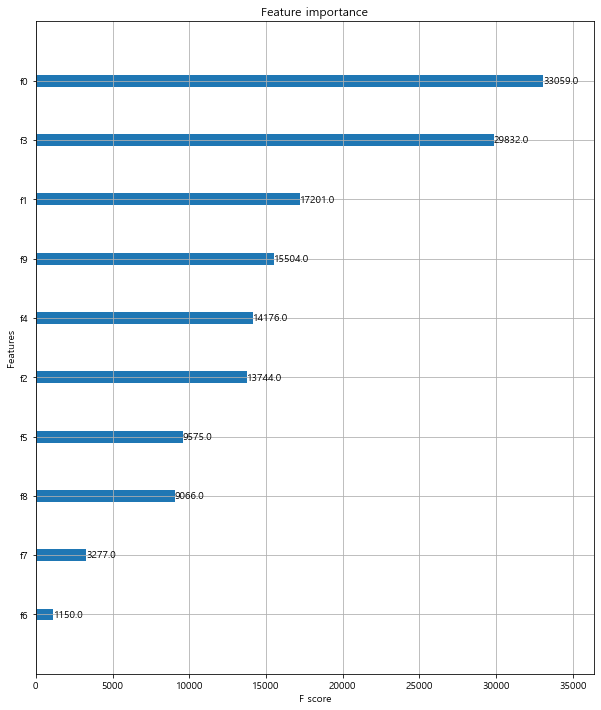

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

### epoch 400 정확도

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

In [91]:
accuracy = accuracy_score(y_test, pred_probs)
accuracy

0.774

### epoch 500 정확도

In [25]:
accuracy2 = accuracy_score(y_test, pred_probs)
accuracy2

0.7968333333333333